In [ ]:
import os
import numpy as np
import pandas as pd

#torch
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

#torchvision
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image

#plot
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/MIB_lab/images"
print(os.listdir(data_dir))
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

['train', 'test']


In [ ]:
class myDataset(Dataset):
  def __init__(self,csv_file,img_dir,transform=None):
    #check if image_dir exist
    if (not os.path.isdir(img_dir)):
      exit('Directory does not exist.')
    
    self.img_labels = pd.read_csv(csv_file,header=None)
    self.img_dir = img_dir
    self.transform = transform

  def __len__(self):
    return len(self.img_labels)
  
  def __getitem__(self,idx):
    img_path = os.path.join(self.img_dir,str(self.img_labels.iloc[idx,0])+'.jpg')
    _image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]

    if self.transform:
      _image = self.transform(_image)
    
    #return _image,label 
    return {'image':_image,'label':label}

In [ ]:
#delete after testing
csv_path1 = os.path.join(train_dir,'train.csv')
csv_path2 = os.path.join(test_dir,'test.csv')
file1 = pd.read_csv(csv_path1,header=None)
patha = os.path.join(train_dir, str(file1.iloc[0,0]))
print(patha)
file1.head()

/content/drive/MyDrive/MIB_lab/images/train/10007


,0,1
0,10007,0
1,10010,0
2,10020,0
3,10030,0
4,10037,0


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), 
     #output of torchvision dataset are PILImage range [0,1], ToTensor() convert this to Tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

csv_path1 = os.path.join(train_dir,'train.csv')
csv_path2 = os.path.join(test_dir,'test.csv')
training_data = myDataset(csv_file=csv_path1,img_dir=train_dir,transform=None)
testing_data = myDataset(csv_file=csv_path2,img_dir=test_dir,transform=None)

In [ ]:
#delete after testing
for i in range(len(training_data)):
  sample = training_data[i]
  print(i,sample['image'].size(),sample['label'])
  if i==2:
    break

0 torch.Size([3, 150, 150]) 0
1 torch.Size([3, 150, 150]) 0
2 torch.Size([3, 150, 150]) 0


In [ ]:
train_dataloader = DataLoader(training_data,batch_size=4,shuffle=True)
test_dataloader = DataLoader(testing_data,batch_size=4,shuffle=False)

Label:1
Label:1
Label:0
Label:0


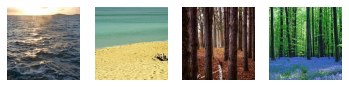

In [ ]:
#second_version testing/ delete after testing
def show_img_batch(sample_batch):
  img_batch,labels_batch = sample_batch['image'],sample_batch['label']
  batch_size = len(img_batch)
  
  # grid = utils.make_grid(img_batch)
  # plt.imshow(grid.numpy().transpose((1,2,0)))

  for i in range(batch_size):
    plt.subplot(1,4,i+1)
    plt.imshow(img_batch[i].permute(1,2,0))
    plt.axis('off')
    # plt.suptitle('Sample batch from Dataloader')
    print(f"Label:{labels_batch[i]}")
  
for ith_batch,sample_batch in enumerate(train_dataloader):
  if ith_batch == 0:
    # plt.figure()
    show_img_batch(sample_batch)
    # plt.show()
    break